In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analyzing Income Distribution and Household Demographics:

### Part - B(Practical)

In [3]:
dataset = pd.read_csv("household_dataset_200_rows.csv")
dataset

,Household_ID,Age_of_Household_Head,Household_Income,Education_Level,Family_Size,Owns_House,Urban_Rural
0,HH_0001,63,88530,Graduate,1,Yes,Urban
1,HH_0002,53,108557,Secondary,5,Yes,Rural
2,HH_0003,39,76087,Graduate,1,Yes,Urban
3,HH_0004,67,83840,Secondary,2,Yes,Urban
4,HH_0005,32,133451,Graduate,1,Yes,Urban
...,...,...,...,...,...,...,...
195,HH_0196,61,31896,Post-Grad,3,Yes,Urban
196,HH_0197,57,145798,Secondary,7,Yes,Urban
197,HH_0198,66,20237,Graduate,4,Yes,Urban
198,HH_0199,68,35056,Secondary,5,Yes,Urban


### Q 1 Types Of Data:
#### Identify which columns are categorical and which are numerical.

In [4]:
print(dataset.dtypes)
print("============================================================================")
categorical = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical Data : {categorical}")
print("============================================================================")
numerical = dataset.select_dtypes(include=['int64']).columns.tolist()
print(f"Numerical Data : {numerical}")

Household_ID             object
Age_of_Household_Head     int64
Household_Income          int64
Education_Level          object
Family_Size               int64
Owns_House               object
Urban_Rural              object
dtype: object
Categorical Data : ['Household_ID', 'Education_Level', 'Owns_House', 'Urban_Rural']
Numerical Data : ['Age_of_Household_Head', 'Household_Income', 'Family_Size']


Conclusion : Hence All The Columns Are Classified as which Are Categorical And Which Are Numerical.

### Q 2 Central Tendency:
#### Calculate Mean, Median, and Mode of Household Income and Age.
#### Interpret the central tendency and comment on income distribution.

In [5]:
#Household Income
#Mean
sum_values_of_household_income = np.sum(dataset["Household_Income"])
mean_household = sum_values_of_household_income/len(dataset)
print(f"Mean : {mean_household}")
print("====================================================================")

#Median
sorted_dataset = np.sort(dataset["Household_Income"])
first_part = len(sorted_dataset)//2
first_part_value = sorted_dataset[first_part]

second_part = first_part - 1
second_part_value = sorted_dataset[second_part]
median_household = (first_part_value + second_part_value)/2
print(f"Median : {median_household}")
print("======================================================================")

#Mode
frequency = {}
for value in dataset["Household_Income"]:
    if value in frequency:
        frequency[value] += 1
    else:
        frequency[value] = 1

max_count = max(frequency.values())
mode_household = [key for key, count in frequency.items() if count == max_count]

print(f"Value : {mode_household[0]}")
print("============================================================================")
print(f"Appears: {max_count} times")


Mean : 86959.77
Median : 89293.5
Value : 88530
Appears: 1 times


In [6]:
#Age
#Mean
sum_values_of_household_income = np.sum(dataset["Age_of_Household_Head"])
mean = sum_values_of_household_income/len(dataset)
print(f"Mean : {mean}")
print("=====================================================================")

#Median
sorted_dataset = np.sort(dataset["Age_of_Household_Head"])
first_part = len(sorted_dataset)//2
first_part_value = sorted_dataset[first_part]

second_part = first_part - 1
second_part_value = sorted_dataset[second_part]
median = (first_part_value + second_part_value)/2
print(f"Median : {median}")
print("=====================================================================")

#Mode
frequency = {}
for value in dataset["Age_of_Household_Head"]:
    if value in frequency:
        frequency[value] += 1
    else:
        frequency[value] = 1

max_count = max(frequency.values())

modes = [key for key, count in frequency.items() if count == max_count]
print(f"Value : {modes[0]}")
print("=====================================================================")
print(f"Appears: {max_count} times")

Mean : 49.26
Median : 50.0
Value : 68
Appears: 10 times


### Central Tendency : HouseHold
Mean : 86959.77

Median : 89293.5

Mode : 88530

### Central Tendency : Age
Mean : 49.26

Median : 50.0

Mode : 68

### Interpretation
1)Since We Can See That In Household Income Mean is Greater Than Median Which Mean The Data Is Positively Skewed (Right Skewed Distribution).
Which means Only Few Household Earns More Income Than All Others. 

2)And We can See that Age Column Is perfectly Symmetric (Normal Distribution).

### Comment on Income Distribution
The Income Distribution Is Not Symmetric. It Is Positively Skewed .

Hence,We Can say That Above Given All Mean,Median,Mode Are Calculated for Both Household Income And Age.

### Q 3 Measures of Dispersion:
#### Calculate Range, Variance, and Standard Deviation of Household Income.
#### Find IQR (Interquartile Range) and comment on income spread.

In [7]:
#Range
range = max(dataset["Household_Income"]) - min(dataset["Household_Income"])
print(f"Range : {range}")
print("=========================================================")

#Variance
deviations = 0
for i in dataset["Household_Income"]:
    deviations += (i - mean_household)**2

sample_variance = deviations/(len(dataset)-1)
population_variance = deviations/len(dataset)
print(f"Sample Variance : {sample_variance}")
print(f"Population Variance : {population_variance}")
print("=========================================================")

#Standard Deviation
std = np.sqrt(population_variance)
print(f"Standard Deviation(Population Variance) : {std}")

Range : 132140
Sample Variance : 1673840946.2885435
Population Variance : 1665471741.5571008
Standard Deviation(Population Variance) : 40810.19163832854


In [21]:
#InterQuarter Range:
first_quarter = np.quantile(dataset["Household_Income"],0.25)
third_quarter = np.quantile(dataset["Household_Income"],0.75)
interquartile_range = third_quarter - first_quarter
print(f"Interquartile Range : {interquartile_range}")

Interquartile Range : 75092.75


Hence we can See That All Range,Variance And Standard Deviation Are Calculated Which means The Spread Of Data Is seen Abpve.

### Q 4 Distribution:
#### Plot a histogram of Household Income.
#### Fit a Gaussian Normal Distribution curve.
#### Calculate Skewness and Kurtosis of the income data. 

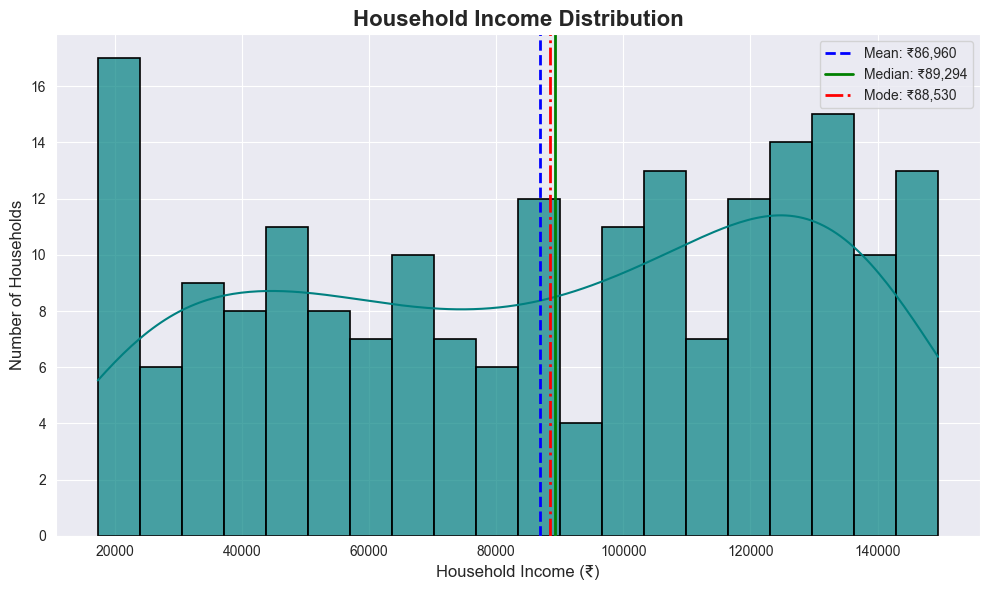

In [9]:
# Histogram Of HouseHold Income With Gaussian Normal Distribution Curve.

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
hist = sns.histplot(data=dataset["Household_Income"],bins=20,kde=True,color="teal",edgecolor="black",alpha=0.7,linewidth=1.2)

hist.axvline(mean_household, color='blue', linestyle='--', linewidth=2, label=f'Mean: ₹{mean_household:,.0f}')
hist.axvline(median_household, color='green', linestyle='-', linewidth=2, label=f'Median: ₹{median_household:,.0f}')
hist.axvline(mode_household[0], color='red', linestyle='-.', linewidth=2, label=f'Mode: ₹{mode_household[0]:,.0f}')

hist.set_title("Household Income Distribution", fontsize=16, weight='bold')
hist.set_xlabel("Household Income (₹)", fontsize=12)
hist.set_ylabel("Number of Households", fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

From The diagram We can See that mean median and mode are approx at the same place. and the shape of KDE is Platykurtic that means the most of all household income is within that range.

In [10]:
from scipy import stats
# Calculationg Skewness And Kurtosis.

# Mean,Median And Standard Deviations Are Calculated Above.

#Skewness
skewness = 3*(mean_household-median_household)/std
print(f"Skewness : {skewness}")
print("===================================================")

#Kurtosis
first_part = 0
for i in dataset["Household_Income"]:
    first_part += ((i-mean_household)/std)**4

kurtosis = (first_part/len(dataset))
print(f"Kurtosis : {kurtosis}")

Skewness : -0.1715549405414832
Kurtosis : 1.7056704540387577


From above we can see that we have calculated Skewness And Kurtosis.

### Q 5 Categorization:
#### Use visualization (boxplot, histogram) to compare household income across different education levels or urban/rural areas.

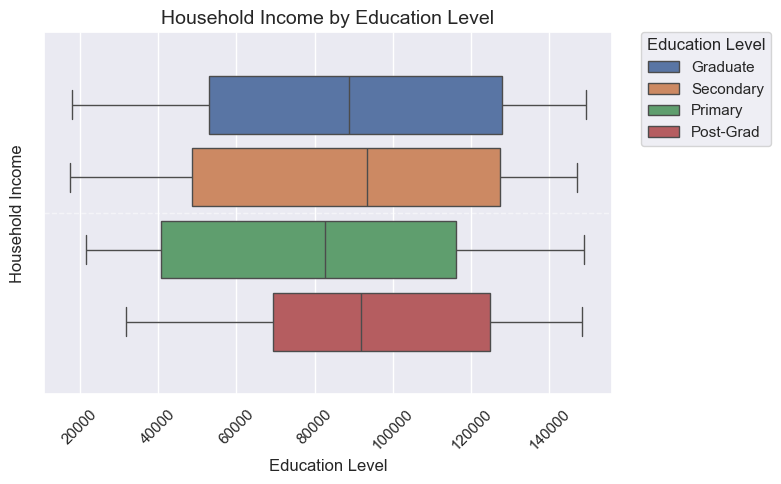

In [11]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.boxplot(data=dataset,x="Household_Income",hue="Education_Level", gap=0.2)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Household Income by Education Level", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlabel("Education Level")
plt.ylabel("Household Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hence ,Education plays a critical role in determining household income. Higher educational attainment is generally associated with higher and more varied income. 

And It Can be Seen That Most Of the data in each Education Level Is From 80000 To 100000.

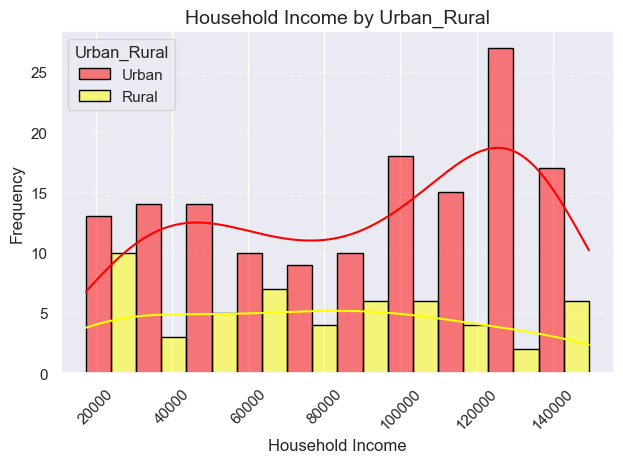

In [12]:
sns.set_theme(style="darkgrid")
sns.histplot(data=dataset,x=dataset["Household_Income"],kde=True,hue=dataset["Urban_Rural"],
             bins=10,element="bars",edgecolor="black",multiple="dodge",palette=["red", "yellow"])
# plt.legend(title="Urban_Rural", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Household Income by Urban_Rural", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlabel("Household Income")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The histogram shows that Urban households generally have a wider income spread and higher frequency in higher income bins, while Rural households are more concentrated in the lower income range.

### Visualizations
#### Histogram and KDE (Kernel Density Estimation) plot
#### Boxplot comparing Family Size by Education Level
#### Distribution Curve for Age vs. Income

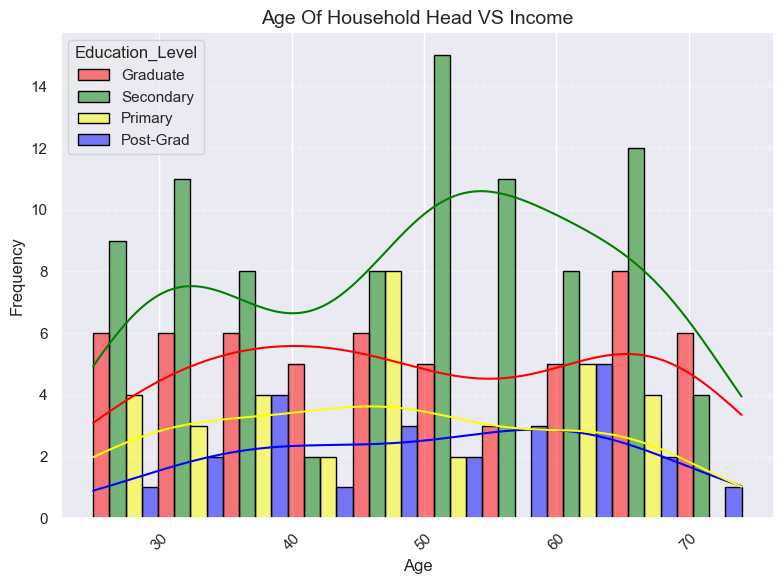

In [13]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.histplot(x=dataset["Age_of_Household_Head"],hue=dataset["Education_Level"],multiple="dodge",bins=10,
             kde=True,palette=["red","green","yellow","blue"],edgecolor="black")
plt.title("Age Of Household Head VS Income", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Hence, We Can See That At Age 50 the Income Is at its Peak And The Highest Income Is Earned .

From The Likes Of this We can See that Post-Graduate Curve Is Playkurtic As It more distributed,

And Secondary Level Is Leptokurtic As It More Peakedness And More Outliers Which Is Not Suitable.

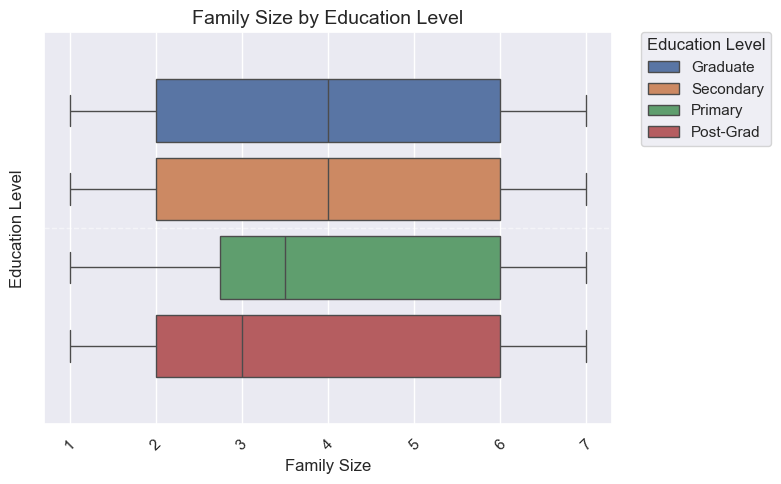

In [18]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
sns.boxplot(data=dataset,x="Family_Size",hue="Education_Level", gap=0.2)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Family Size by Education Level", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlabel("Family Size")
plt.ylabel("Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hence,It Represent that those which Are graduate And Secondary have a family size of 4 and those not have a family size of 3 an average.

Hence There are No Outliers In the Box Plot.